In [16]:
import construction as cs
from ETN import *
from ETMM import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Parameters 
k = 3    # number of static snapshot used for the constructions of ETN
gap = 299   # temporal gap
label = False # if true, the loaded dataset is labeled
file_name = "InVS13" # name of the file

### Load the temporal graph as a sequence of static NetworkX graphs

In [3]:
data = cs.load_data("Datasets/"+file_name+".dat")
if label:
    meta_data = cs.load_metadata("Datasets/metadata/metadata_"+file_name+".dat")
else:
    meta_data = None
    
if label:
    graphs = cs.build_graphs(data,gap=gap,with_labels=label,meta_path="Datasets/metadata/metadata_"+file_name+".dat")
else:
    graphs = cs.build_graphs(data,gap=gap,with_labels=label)

### count ETN or LETN and store the result

In [4]:
S = count_ETN(graphs,k,meta=meta_data)
S = {k: v for k, v in sorted(S.items(), key=lambda item: item[1], reverse=1)}

store_etns(S,file_name,gap,k,label=label)

file stored in: 	res/InVS13/ETNS/gap_299_k_3.json


In [18]:
print(S)

{'0b1000': 2221, '0b1100': 501, '0b1111': 435, '0b10001000': 270, '0b1110': 217, '0b01001000': 164, '0b00011000': 122, '0b1010': 122, '0b1001': 97, '0b00101000': 90, '0b10001100': 87, '0b1101': 85, '0b1011': 62, '0b01001100': 60, '0b100010001000': 43, '0b10001111': 34, '0b00011111': 27, '0b10001110': 26, '0b00011100': 26, '0b01101000': 25, '0b00101100': 24, '0b00101110': 23, '0b00111000': 23, '0b010010001000': 22, '0b010001001000': 21, '0b01001110': 21, '0b11001100': 19, '0b01001111': 18, '0b00011110': 17, '0b000100011000': 17, '0b1000100010001000': 16, '0b00101010': 16, '0b01111000': 16, '0b001010001000': 15, '0b10001010': 15, '0b00101111': 14, '0b00011001': 14, '0b000110001000': 13, '0b10001001': 13, '0b00111100': 12, '0b010010001100': 12, '0b001000101000': 12, '0b00011010': 11, '0b00011101': 11, '0b01101110': 10, '0b010001001100': 10, '0b001001101000': 10, '0b01101100': 10, '0b00111111': 9, '0b000100101000': 9, '0b11001110': 9, '0b01001010': 8, '0b01001001': 8, '0b11101111': 8, '0b0

In [5]:
# load etns 
SS = load_etns(file_name,gap,k,label=label)
assert(SS == S)

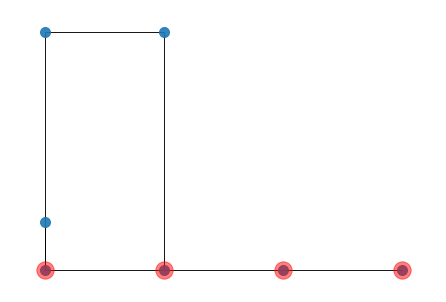

In [24]:
S_array = list(S.keys())
draw_ETN(from_ETNS_to_ETN(S_array[10],k=3,meta=None),multiple=False)

count 	 = 	 2221
count 	 = 	 501
count 	 = 	 435
count 	 = 	 270
count 	 = 	 217
count 	 = 	 164


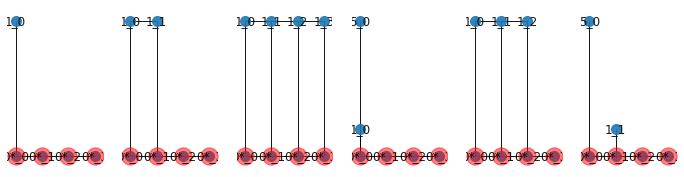

In [6]:
# plot 6 most frequent ETN
fig_per_row = 6
S_array = list(S.keys())
for i in range(0,6,fig_per_row):
    plt.figure(figsize=(12,3))
    for j in range(fig_per_row):
        plt.subplot(1,fig_per_row,j+1)
        print("count \t = \t",S[S_array[i+j]])
        draw_ETN(from_ETNS_to_ETN(S_array[i+j],k,meta_data),multiple=True)
    plt.show()

# Build Null models

In [27]:
def buil_nm(graphs,n,file):
    t = 0
    to_save = []
    f = open("null_models/"+file+"/"+file+"_"+str(n)+".txt", "a")
    for g in graphs:
        for e in g.edges():
            s = str(t)+" "+str(e[0])+" "+str(e[1])+"\n"
            f.write(s)
        t = t + gap + 1
    f.close()

In [28]:
seed = 10
n = 5
null_models = shuffle_graphs(graphs,n,seed)
print(len(null_models))

5


In [29]:
# store null models
c = 0
for graphs in null_models:
    buil_nm(graphs,c,file_name)
    c = c + 1

# Egocentric temporal motifs miner ETMM

In [30]:
# load precoputed etns
S = load_etns(file_name,gap,k,label)

In [31]:
# count etn in null models and store the results

counts = counts_ETN_null_models(null_models,S,k,label,meta_data,verbose=True)
store_etm_counts(counts,file_name,gap,k,label)

done 1
done 2
done 3
done 4
done 5
file stored in: 	res/InVS13/ETM_counts/gap_299_k_3.json


In [32]:
tmp = load_etm_count(file_name,gap,k,label)
assert(tmp == counts)

In [33]:
counts

{'0b1000': [2221, 3536, 3594, 3554, 3549, 3569],
 '0b1100': [501, 75, 85, 89, 90, 77],
 '0b1111': [435, 0, 4, 2, 2, 0],
 '0b10001000': [270, 518, 530, 512, 523, 520],
 '0b1110': [217, 5, 5, 8, 4, 3],
 '0b01001000': [164, 226, 237, 241, 224, 227],
 '0b00011000': [122, 242, 226, 243, 241, 206],
 '0b1010': [122, 85, 91, 89, 73, 83],
 '0b1001': [97, 65, 72, 70, 70, 82],
 '0b00101000': [90, 252, 225, 223, 254, 241],
 '0b10001100': [87, 15, 8, 17, 15, 16],
 '0b1101': [85, 8, 8, 1, 8, 4],
 '0b1011': [62, 12, 5, 5, 7, 6],
 '0b01001100': [60, 14, 16, 13, 13, 18],
 '0b100010001000': [43, 98, 98, 104, 97, 107],
 '0b10001111': [34, 0, 0, 0, 0, 0],
 '0b00011111': [27, 0, 1, 0, 0, 0],
 '0b10001110': [26, 0, 2, 1, 0, 0],
 '0b00011100': [26, 10, 7, 7, 7, 8],
 '0b01101000': [25, 7, 7, 9, 6, 5],
 '0b00101100': [24, 6, 8, 10, 6, 10],
 '0b00101110': [23, 0, 4, 1, 0, 1],
 '0b00111000': [23, 2, 11, 2, 9, 7],
 '0b010010001000': [22, 28, 28, 26, 29, 32],
 '0b010001001000': [21, 34, 27, 26, 27, 34],
 '0b010011

# Apply statistical test

In [13]:
alpha=0.01
beta=0.1
gamma=10

ETM = get_ETM(counts,alpha,beta,gamma)

number of etns:	 392 
number of etm: 	 31


count 	 = 	 501
count 	 = 	 435
count 	 = 	 217
count 	 = 	 122
count 	 = 	 97
count 	 = 	 87


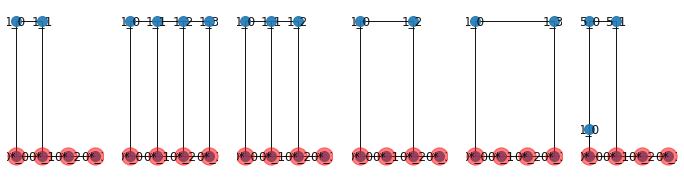

In [14]:
fig_per_row = 6
for i in range(0,fig_per_row,fig_per_row):
    plt.figure(figsize=(12,3))
    for j in range(fig_per_row):
        plt.subplot(1,fig_per_row,j+1)
        print("count \t = \t",ETM[i+j][1])
        draw_ETN(from_ETNS_to_ETN(ETM[i+j][0],k,meta_data),multiple=True)
    plt.show()